In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
df_goleadores = pd.read_csv('Goleadores_Premier_2024_2014_con_año.csv')
df_asistidores = pd.read_csv('Asistidores_2014_2024.csv')
df_posiciones = pd.read_csv('Premier_League_2024_2014_con_año.csv')

In [26]:
df_goleadores['Posicion'] = np.tile(range(1, 51), len(df_goleadores)//50 + 1)[:len(df_goleadores)]
df_goleadores.drop(columns=['Unnamed: 0'], inplace=True)
df_asistidores.drop(columns=['Unnamed: 0'], inplace=True)
df_posiciones.drop(columns=['Unnamed: 0', 'Ultimos5_1', 'Ultimos5_2', 'Ultimos5_3', 'Ultimos5_4', 'Ultimos5_4', 'Ultimos5_5'], inplace=True)

In [27]:
df_goleadores

,Posicion,Jugador,Equipo,Partidos,Goles,Año
0,1,Sergio Agüero,Manchester City,33,26,2014
1,2,Harry Kane,Tottenham Hotspur,34,21,2014
2,3,Diego Costa,Chelsea,26,20,2014
3,4,Charlie Austin,Queens Park Rangers,35,18,2014
4,5,Alexis Sánchez,Arsenal,35,16,2014
...,...,...,...,...,...,...
495,46,Jhon Durán,Aston Villa,20,7,2024
496,47,Anthony Elanga,Nottingham Forest,33,6,2024
497,48,Anthony Gordon,Newcastle United,30,6,2024
498,49,Emile Smith Rowe,Fulham,30,6,2024


In [28]:
df_asistidores

,Ranking,Jugador,Equipo,Partidos,Asistencias,Periodo
0,1,Cesc Fàbregas,Chelsea,34,18,2014
1,2,Santi Cazorla,Arsenal,37,11,2014
2,3,Chris Brunt,West Bromwich Albion,34,10,2014
3,4,Gylfi Sigurdsson,Swansea City,32,10,2014
4,5,Ángel Di María,Manchester United,27,10,2014
...,...,...,...,...,...,...
495,46,Tyrick Mitchell,Crystal Palace,34,4,2024
496,47,Ismaïla Sarr,Crystal Palace,34,4,2024
497,48,Daniel Muñoz,Crystal Palace,33,4,2024
498,49,Antoine Semenyo,AFC Bournemouth,32,4,2024


In [29]:
df_posiciones

,Rank,Club,PJ,G,E,P,GF,GC,DG,Pts,Año
0,1,Chelsea,38,26,9,3,73,32,41,87,2014
1,2,Manchester City,38,24,7,7,83,38,45,79,2014
2,3,Arsenal,38,22,9,7,71,36,35,75,2014
3,4,Manchester United,38,20,10,8,62,37,25,70,2014
4,5,Tottenham,38,19,7,12,58,53,5,64,2014
...,...,...,...,...,...,...,...,...,...,...,...
215,16,Tottenham,33,11,4,18,61,51,10,37,2024
216,17,West Ham,34,9,9,16,39,58,-19,36,2024
217,18,Ipswich,34,4,9,21,33,74,-41,21,2024
218,19,Leicester City,34,4,6,24,27,76,-49,18,2024


In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

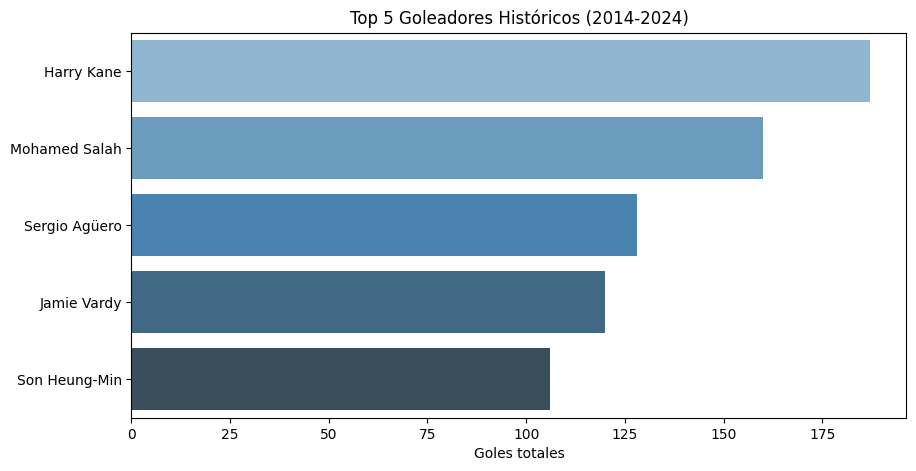

In [43]:
top_goleadores = df_goleadores.groupby('Jugador')['Goles'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_goleadores.values, y=top_goleadores.index, palette='Blues_d')
plt.title('Top 5 Goleadores Históricos (2014-2024)')
plt.xlabel('Goles totales')
plt.ylabel('')
plt.show()

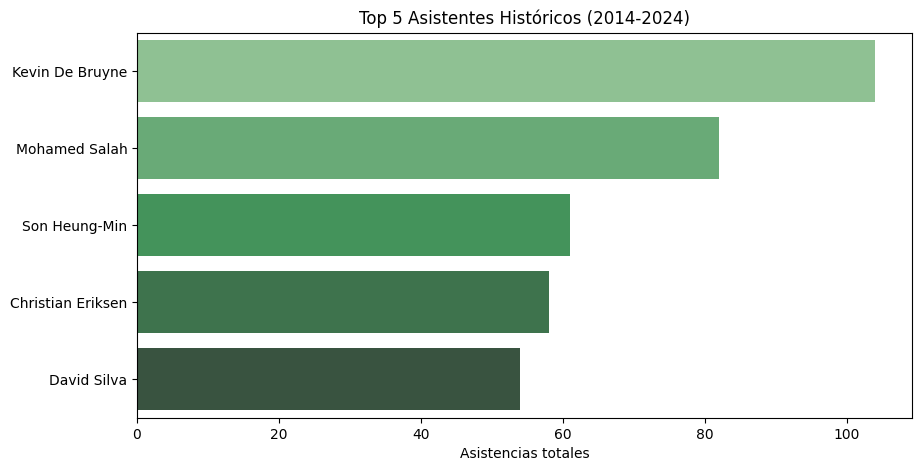

In [44]:
top_asistentes = df_asistidores.groupby('Jugador')['Asistencias'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_asistentes.values, y=top_asistentes.index, palette='Greens_d')
plt.title('Top 5 Asistentes Históricos (2014-2024)')
plt.xlabel('Asistencias totales')
plt.ylabel('')
plt.show()

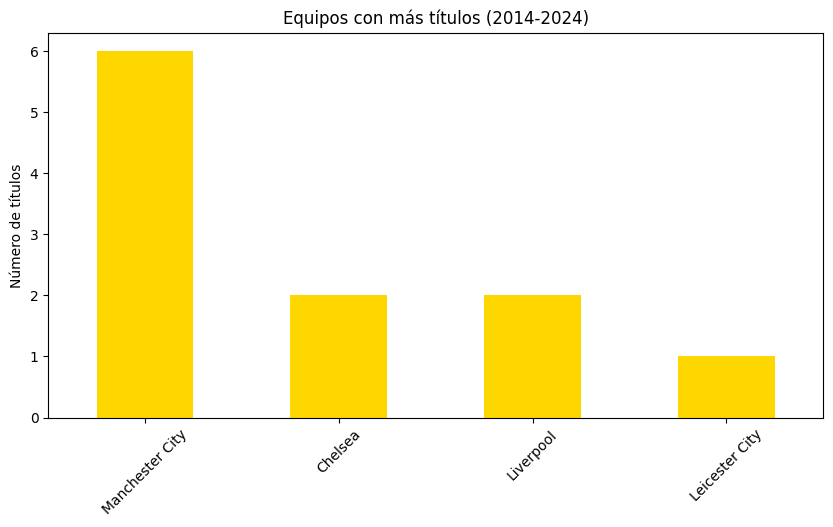

In [45]:
campeones = df_posiciones[df_posiciones['Rank'] == 1]['Club'].value_counts()

plt.figure(figsize=(10,5))
campeones.plot(kind='bar', color='gold')
plt.title('Equipos con más títulos (2014-2024)')
plt.xlabel('')
plt.ylabel('Número de títulos')
plt.xticks(rotation=45)
plt.show()

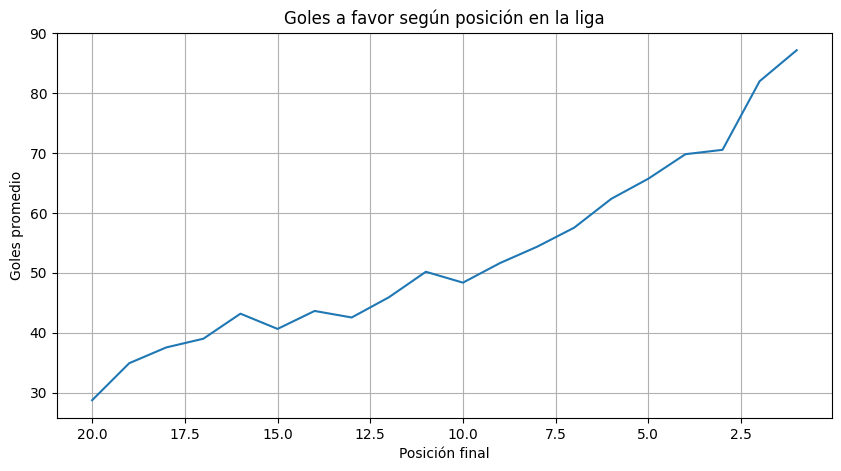

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_posiciones, x='Rank', y='GF', ci=None)
plt.title('Goles a favor según posición en la liga')
plt.xlabel('Posición final')
plt.ylabel('Goles promedio')
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

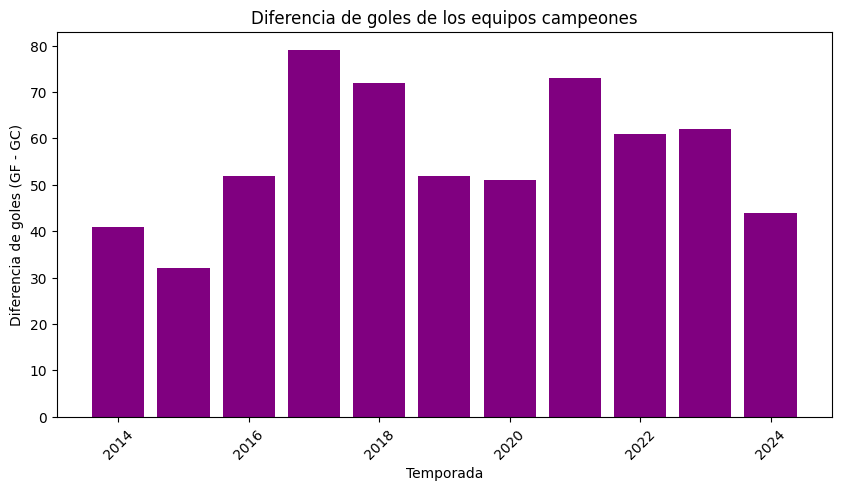

In [47]:
campeones_data = df_posiciones[df_posiciones['Rank'] == 1]

plt.figure(figsize=(10,5))
plt.bar(campeones_data['Año'], campeones_data['DG'], color='purple')
plt.title('Diferencia de goles de los equipos campeones')
plt.xlabel('Temporada')
plt.ylabel('Diferencia de goles (GF - GC)')
plt.xticks(rotation=45)
plt.show()

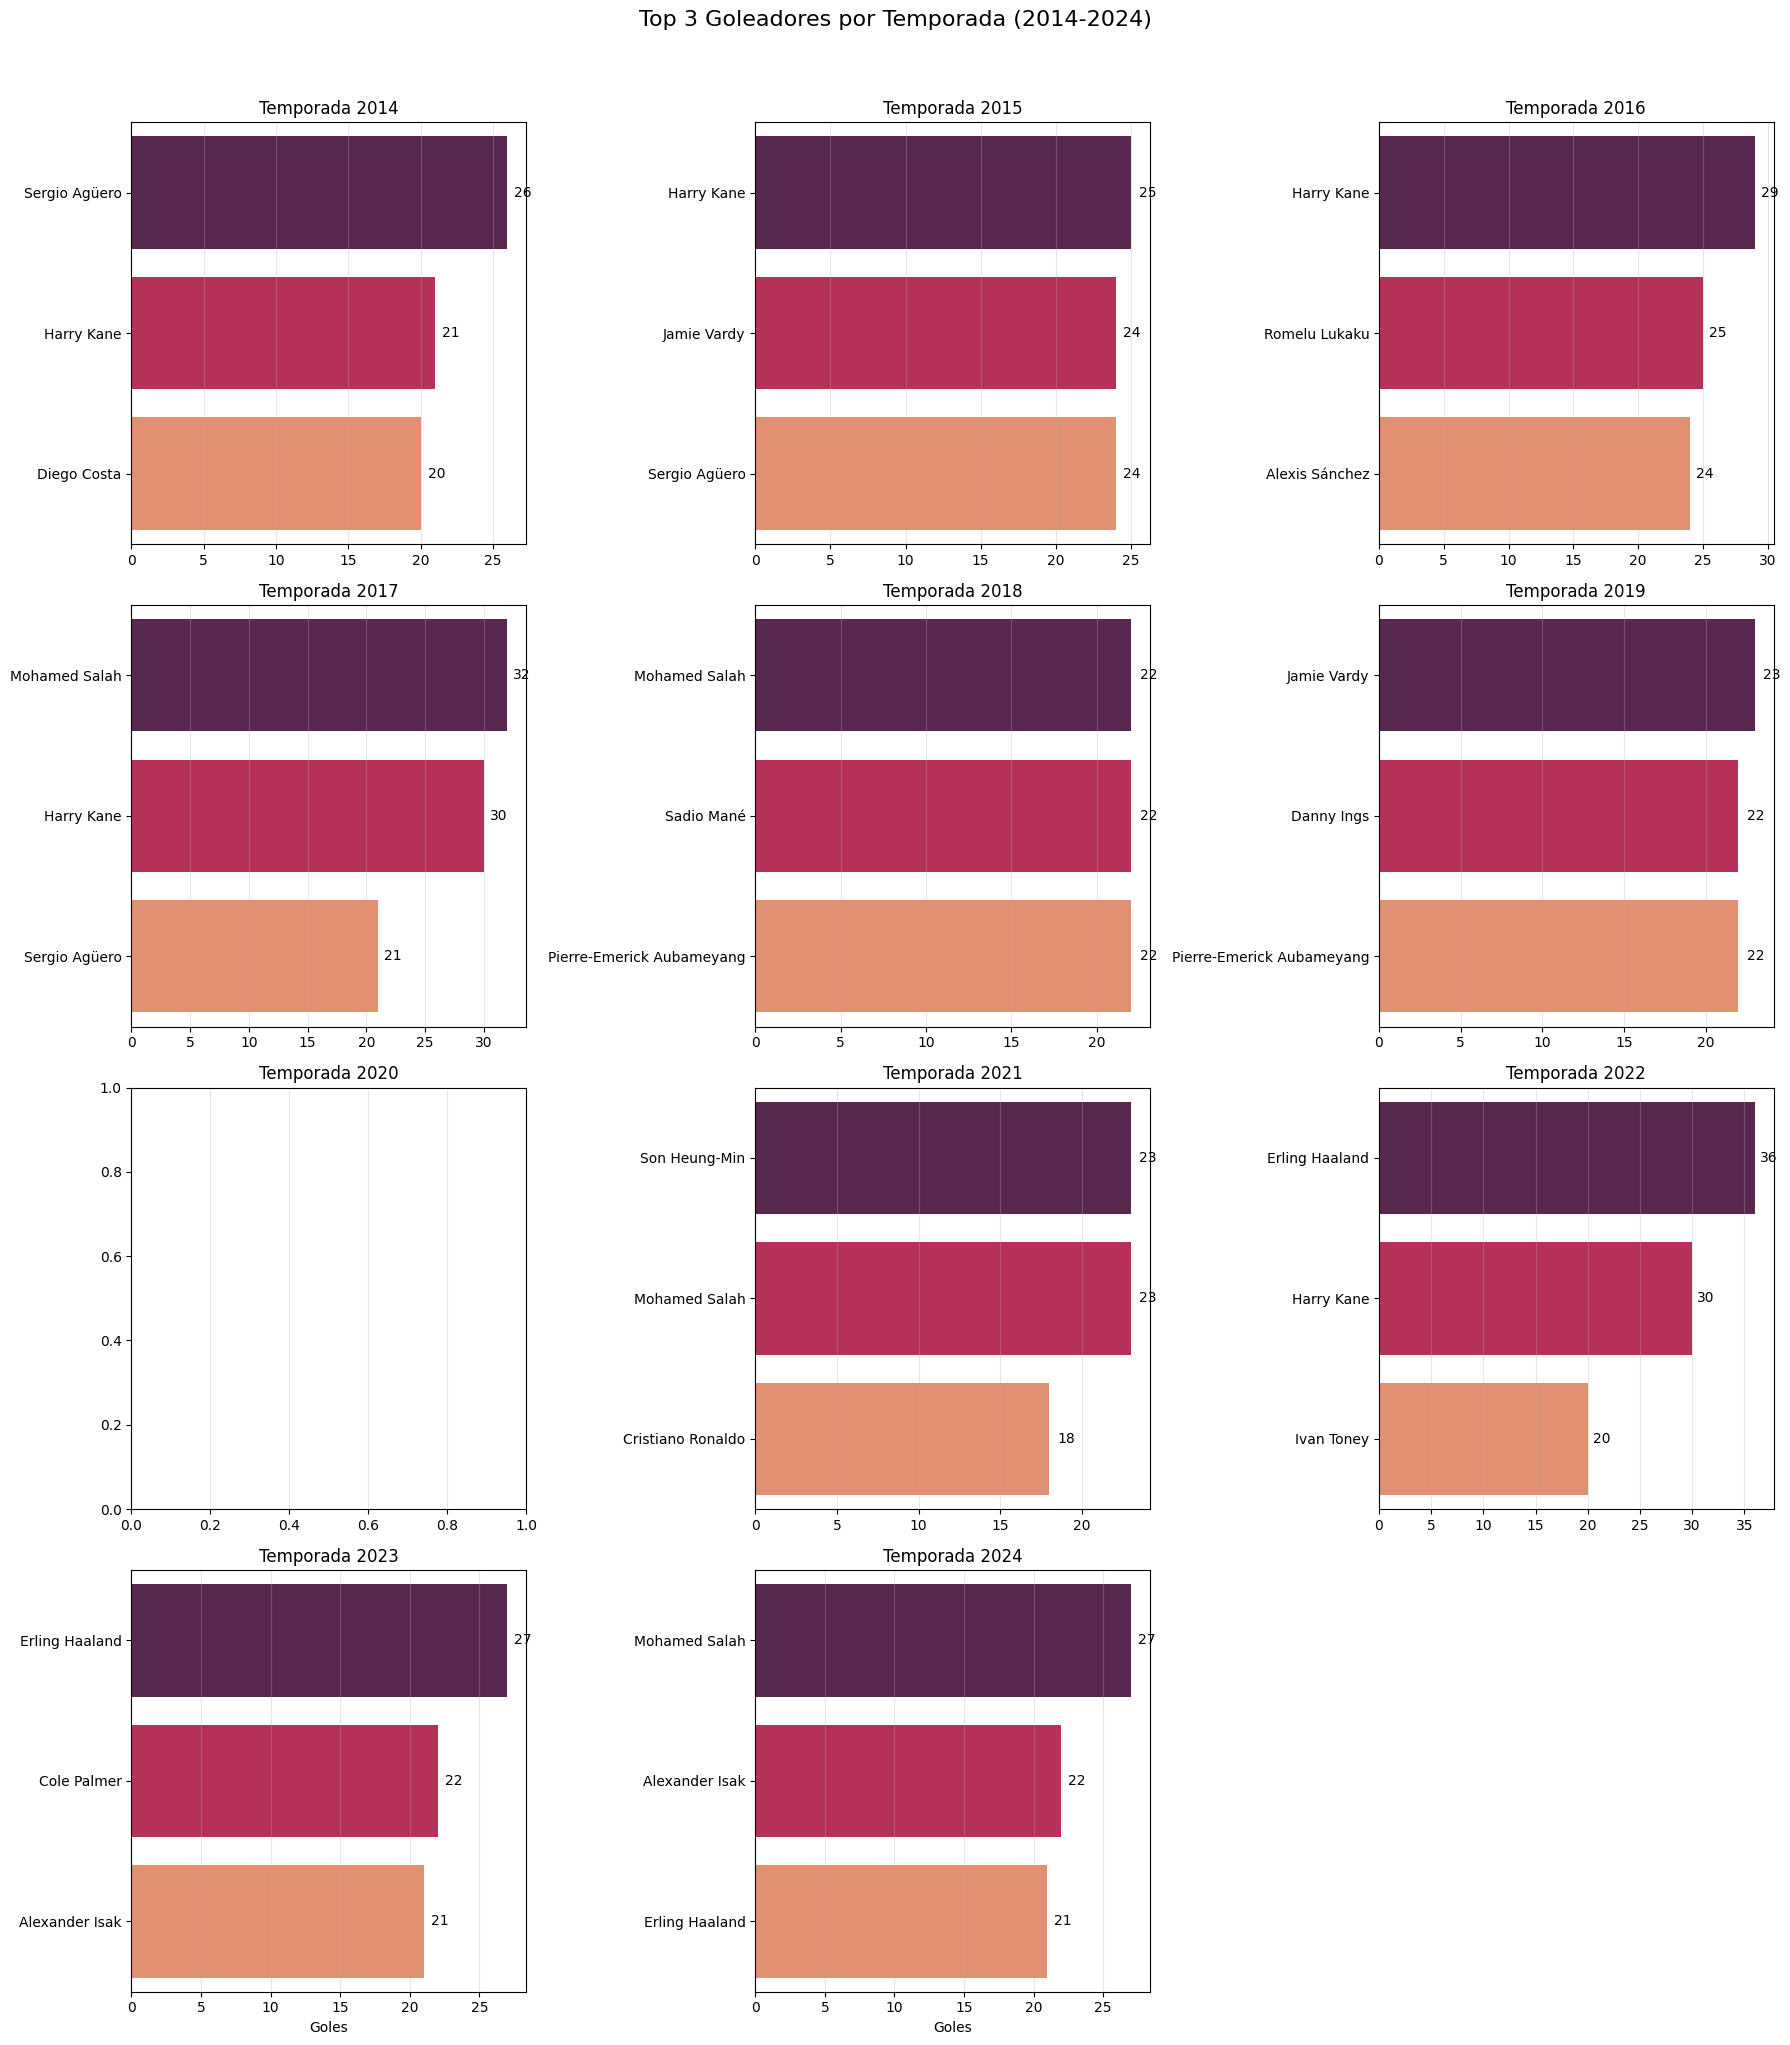

In [48]:
plt.figure(figsize=(18, 20))
plt.suptitle('Top 3 Goleadores por Temporada (2014-2024)', y=1.02, fontsize=16)

# Crear subplots - 4 filas x 3 columnas (para 10 años)
for i, year in enumerate(range(2014, 2024 + 1)):
    ax = plt.subplot(4, 3, i + 1)  # 4 filas, 3 columnas
    
    # Obtener datos para el año actual
    top_year = df_goleadores[df_goleadores['Año'] == year].sort_values('Goles', ascending=False).head(3)
    
    # Gráfico de barras
    sns.barplot(x='Goles', y='Jugador', data=top_year, palette='rocket', ax=ax)
    
    # Personalización
    ax.set_title(f'Temporada {year}', fontsize=12)
    ax.set_xlabel('Goles' if i in [9, 10] else '', fontsize=10)  # Solo mostrar en los últimos
    ax.set_ylabel('')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir etiquetas de valor
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5, p.get_y() + p.get_height()/2, f'{int(width)}', 
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [51]:
goles_por_equipo = df_goleadores.groupby('Equipo')['Goles'].sum()
asistencias_por_equipo = df_asistidores.groupby('Equipo')['Asistencias'].sum()

diferencia_equipos = pd.DataFrame({
    'Goles': goles_por_equipo,
    'Asistencias' : asistencias_por_equipo
}
). fillna(0)

diferencia_equipos['Total'] = diferencia_equipos['Goles'] + diferencia_equipos['Asistencias']

top_10_equipos = diferencia_equipos.sort_values('Total', ascending=False).head(10)

In [52]:
top_10_equipos


,Goles,Asistencias,Total
Equipo,,,
Manchester City,639,453.0,1092.0
Liverpool,503,351.0,854.0
Tottenham Hotspur,454,284.0,738.0
Arsenal,408,319.0,727.0
Chelsea,349,243.0,592.0
Manchester United,326,204.0,530.0
West Ham United,259,152.0,411.0
Leicester City,253,152.0,405.0
Newcastle United,221,153.0,374.0


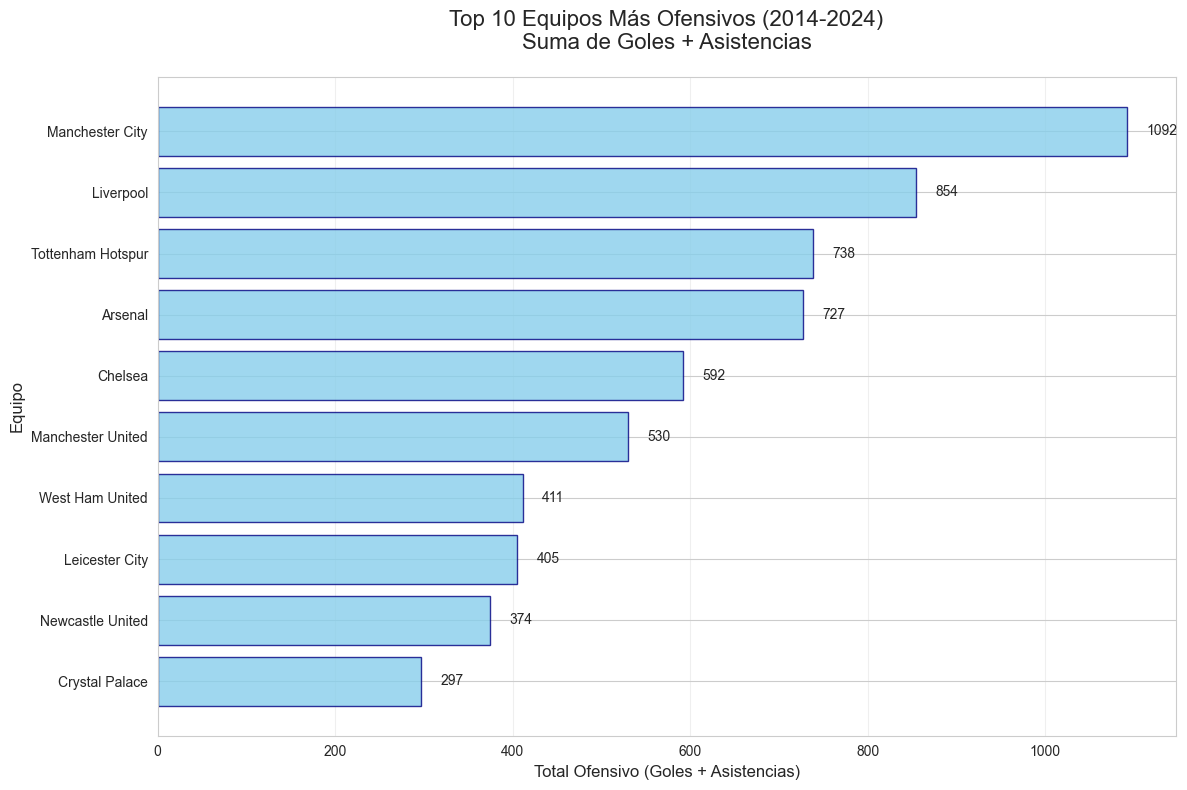

In [56]:
# Configuración del estilo (versión corregida)
plt.style.use('default')  # Usamos el estilo por defecto
sns.set_style("whitegrid")  # Estilo de Seaborn
plt.figure(figsize=(12, 8))

# Ordenar los datos para el gráfico
top_10_equipos = top_10_equipos.sort_values('Total', ascending=True)

# Crear gráfico de barras horizontales
bars = plt.barh(top_10_equipos.index, top_10_equipos['Total'], 
                color='skyblue', edgecolor='navy', alpha=0.8)

# Personalización
plt.title('Top 10 Equipos Más Ofensivos (2014-2024)\nSuma de Goles + Asistencias', 
          fontsize=16, pad=20)
plt.xlabel('Total Ofensivo (Goles + Asistencias)', fontsize=12)
plt.ylabel('Equipo', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Añadir etiquetas de valor
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.02 * max(top_10_equipos['Total'])),  # Posición relativa al máximo
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

In [57]:
goleadores_arsenal = df_goleadores[df_goleadores['Equipo'] == 'Arsenal'].copy()

In [58]:
goleadores_arsenal

,Posicion,Jugador,Equipo,Partidos,Goles,Año
4,5,Alexis Sánchez,Arsenal,35,16,2014
7,8,Olivier Giroud,Arsenal,27,14,2014
30,31,Santi Cazorla,Arsenal,37,7,2014
46,47,Aaron Ramsey,Arsenal,29,6,2014
55,6,Olivier Giroud,Arsenal,38,16,2015
59,10,Alexis Sánchez,Arsenal,30,13,2015
90,41,Mesut Özil,Arsenal,35,6,2015
102,3,Alexis Sánchez,Arsenal,38,24,2016
116,17,Olivier Giroud,Arsenal,29,12,2016
120,21,Theo Walcott,Arsenal,28,10,2016


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [66]:
# Filtrar solo los equipos del Big Six
big_six = ['Manchester City', 'Liverpool', 'Chelsea', 'Arsenal', 'Manchester United', 'Tottenham']
df_big_six = df_posiciones[df_posiciones['Club'].isin(big_six)].copy()

# Crear características (features)
df_big_six['Pts_por_partido'] = df_big_six['Pts'] / df_big_six['PJ']
df_big_six['DG_por_partido'] = df_big_six['DG'] / df_big_six['PJ']

In [68]:
# Calcular promedios móviles de 3 años
features = ['Pts', 'GF', 'GC', 'DG', 'Pts_por_partido', 'DG_por_partido']

for feature in features:
    df_big_six[f'{feature}_3y_avg'] = df_big_six.groupby('Club')[feature].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )

# Crear variable objetivo (posición)
df_big_six = df_big_six.sort_values(['Año', 'Rank'])

In [69]:
# Dividir datos
X = df_big_six[['Pts_3y_avg', 'GF_3y_avg', 'GC_3y_avg', 'DG_3y_avg']]
y = df_big_six['Rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(f'Error absoluto medio: {mean_absolute_error(y_test, y_pred):.2f}')

Error absoluto medio: 2.18


In [72]:
# Obtener datos más recientes
ultimos_datos = df_big_six.groupby('Club').last()

# Predecir
predicciones = pd.DataFrame({
    'Club': ultimos_datos.index,
    'Prediccion_Rank': model.predict(ultimos_datos[['Pts_3y_avg', 'GF_3y_avg', 'GC_3y_avg', 'DG_3y_avg']])
}).sort_values('Prediccion_Rank')

# Ajustar a posiciones 1-6
predicciones['Posicion_Predicha'] = range(1, 7)

print("\nPredicción para la próxima temporada:")
print(predicciones[['Club', 'Posicion_Predicha']].to_markdown(index=False))


Predicción para la próxima temporada:
| Club              |   Posicion_Predicha |
|:------------------|--------------------:|
| Liverpool         |                   1 |
| Manchester City   |                   2 |
| Arsenal           |                   3 |
| Tottenham         |                   4 |
| Chelsea           |                   5 |
| Manchester United |                   6 |


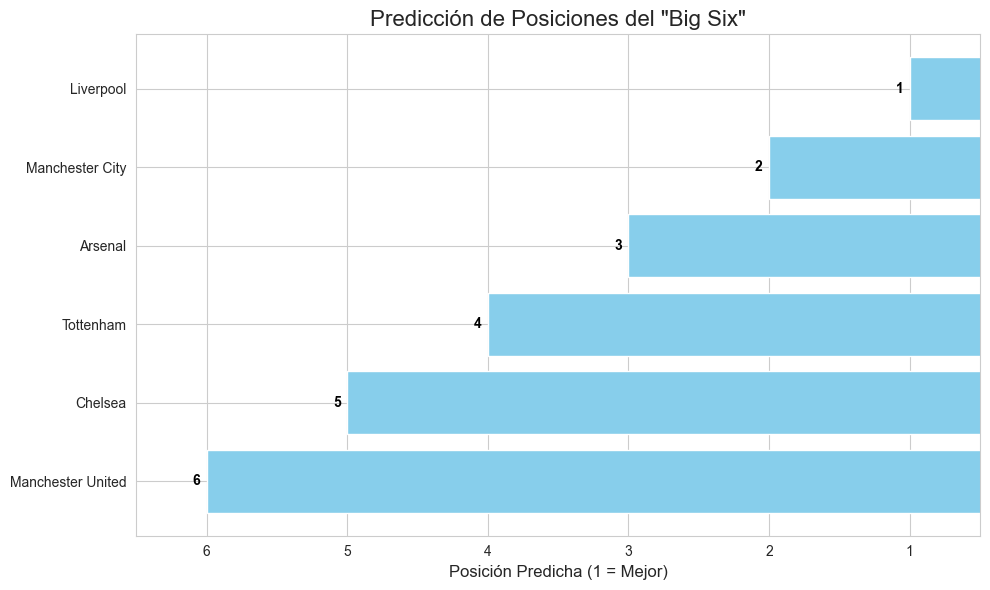

In [73]:
plt.figure(figsize=(10, 6))
plt.barh(predicciones['Club'], predicciones['Posicion_Predicha'], color='skyblue')
plt.title('Predicción de Posiciones del "Big Six"', fontsize=16)
plt.xlabel('Posición Predicha (1 = Mejor)', fontsize=12)
plt.xlim(0.5, 6.5)
plt.gca().invert_xaxis()  # Para que 1 quede arriba
plt.gca().invert_yaxis()  # Para que el primero quede arriba

for i, v in enumerate(predicciones['Posicion_Predicha']):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()